In [34]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

import pygal
from IPython.display import SVG, display
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [40]:

dataorginal = pd.read_excel('C:\\IBMPRO\\notebook\\data\\df.xlsx')

In [41]:
dataorginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
# No null values

In [43]:
# Defining X variable
# Dropping irrelevent features and predictor varaible
X=dataorginal.drop(['EmployeeNumber','Over18','EmployeeCount','Attrition'],axis=1)

In [25]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [26]:
X = preprocessor.fit_transform(X)

In [27]:
X.shape


(1470, 31)

In [42]:
y=dataorginal['Attrition']

 # Feature Selection
Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

1) Fight against the curse of dimensionality.

2) Reduce the overall training time.

3) Defense against overfitting.

4) Increase model generalizability.

Feature Selection Models
Supervised Models

  Filter methods

    F Test
    Mutual information
    Variance threshold
    Chi Square
    Correlation coefficient
    ANNOVA
    LDA

  Wrapper methods

    Forward search
    Backward selection
    Recursive feature elimination
Unsupervised Model

In [30]:
# Importing libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Checking correlation between varaibles

In [32]:
dataorginal['OverTime'].replace('Yes',1,inplace=True)
dataorginal['OverTime'].replace('No',0,inplace=True)

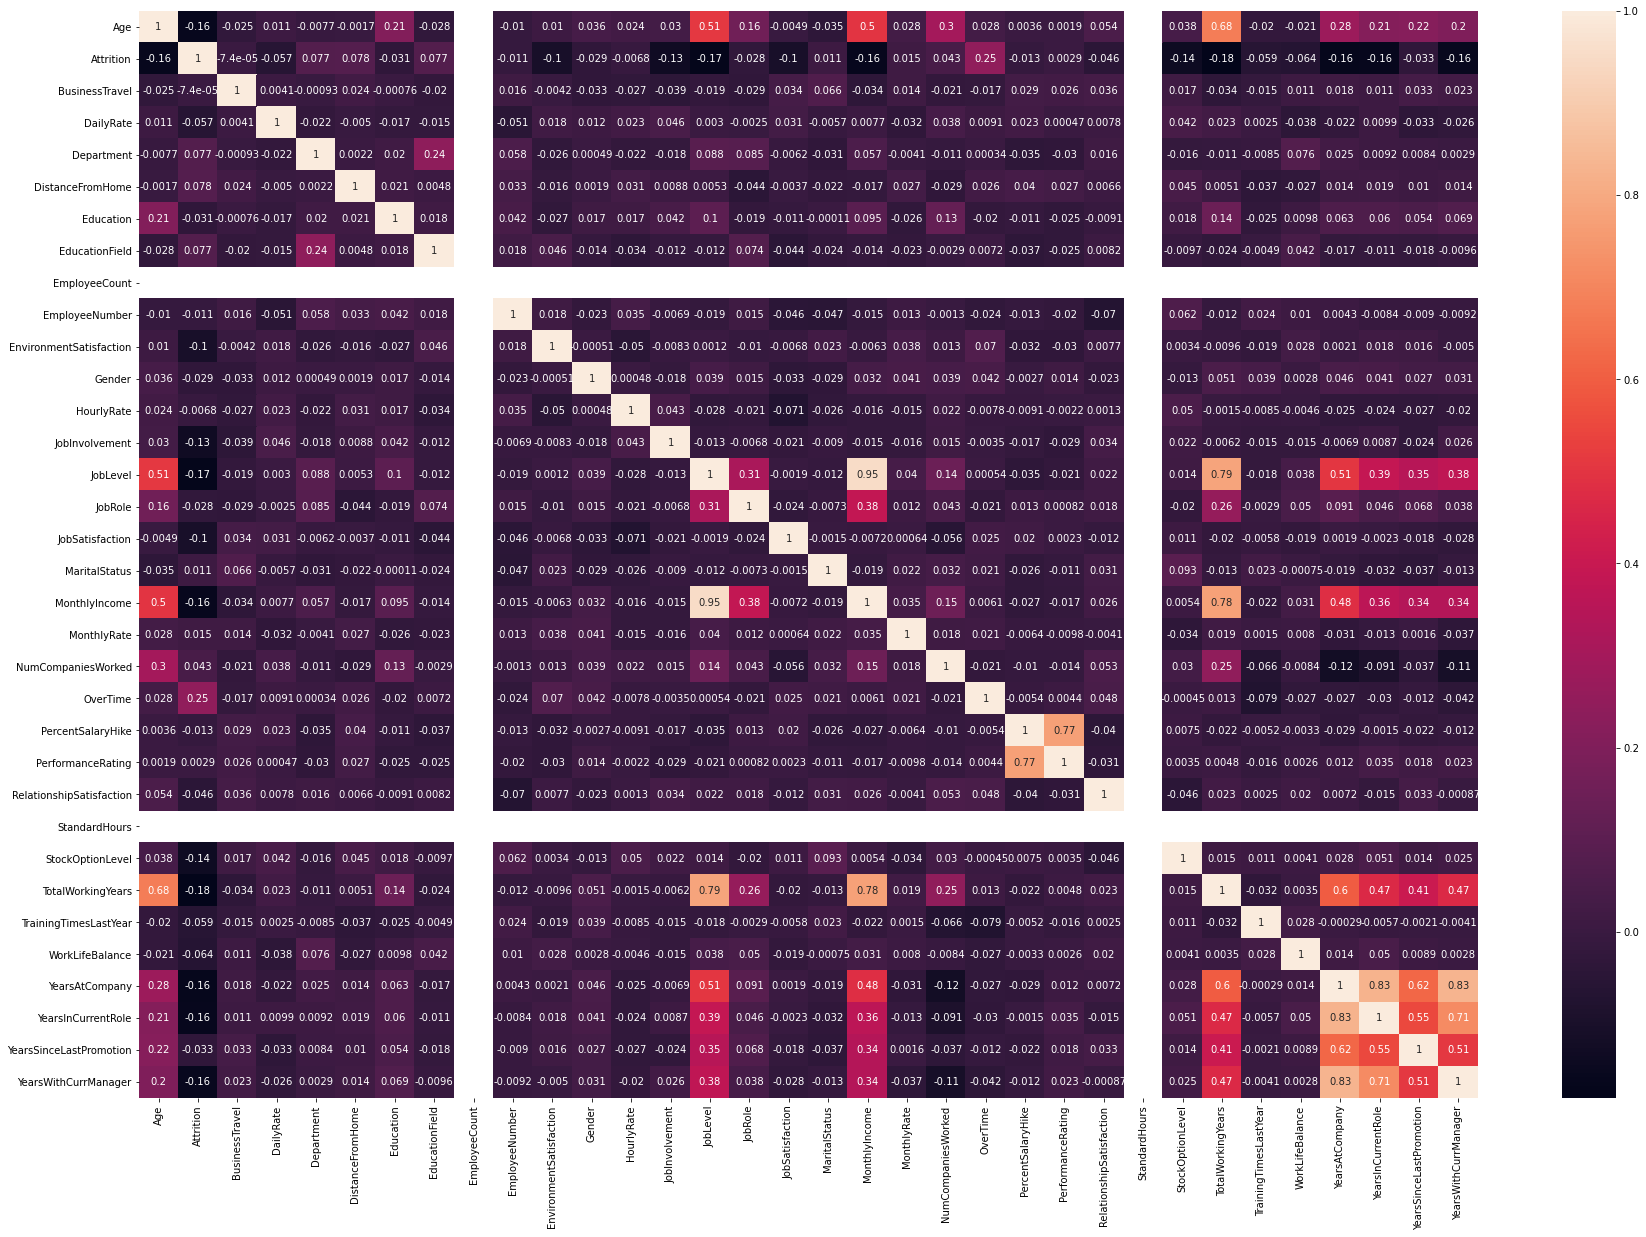

In [36]:
plt.figure(figsize=(30,20))   # Size of the figure
sns.heatmap(dataorginal.corr(),annot=True)
plt.show()

# Feature selection Through correlation


In [37]:
# With following function we can select highly correlated features
# It will remove the first features that is correlated with any other feature
def correlation_set(dataset,threshold):
    col_corr=set() # Tos store set of all the name of correlayed features
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[j,i]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [52]:
# Calling the function to drop features who are highlt correlated above 0.6
corr_feature=correlation_set(X,0.6)


In [53]:
corr_feature

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [54]:
# dROPIING HIGH;Y CORRELATED FEATURES
X=X.drop(corr_feature,axis=1)


In [55]:
# uSING CHI SQUARE

In [56]:
# Apply Select kbest algorithm
ordered_features=SelectKBest(score_func=chi2,k=15)
ordered_features.fit(X,y)

SelectKBest(k=15, score_func=<function chi2 at 0x000001F11F6C0940>)

In [57]:
ordered_features.scores_

array([8.41552768e+01, 2.54272825e-06, 9.56580494e+02, 2.04774701e+00,
       6.37721416e+01, 5.20642224e-01, 7.43336377e+00, 6.89059434e+00,
       2.18608519e-01, 4.31779090e-01, 4.60561607e+00, 2.49392423e+01,
       1.74185185e+00, 7.01194663e+00, 6.52343486e-02, 1.19663355e+03,
       6.43865444e+00, 6.38450667e+01, 2.35026858e-01, 1.33233286e+00,
       0.00000000e+00, 2.52688260e+01, 3.08579616e+00, 1.08554296e+00,
       1.45425656e+02])

In [58]:
selected_feature=pd.DataFrame(ordered_features.scores_,columns=['Score'])

In [59]:
selected_feature_score=pd.DataFrame(X.columns)

In [60]:
selected_feature_score=pd.concat([selected_feature_score,selected_feature],axis=1)
selected_feature_score.columns=['Features','Score']

In [61]:
selected_feature_score.sort_values("Score",ascending=False)[:20]

,Features,Score
15,MonthlyRate,1196.633553
2,DailyRate,956.580494
24,YearsAtCompany,145.425656
0,Age,84.155277
17,OverTime,63.845067
4,DistanceFromHome,63.772142
21,StockOptionLevel,25.268826
11,JobLevel,24.939242
6,EducationField,7.433364
13,JobSatisfaction,7.011947


In [62]:
# dROPING SIMILAR FEATURES

from sklearn.feature_selection import VarianceThreshold

In [63]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [64]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True])

In [65]:
sum(var_thres.get_support())

24

In [66]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))
print((constant_columns))

1
['StandardHours']


In [67]:
X=X.drop(['StandardHours'],1)

In [68]:
col_values = list(X.columns.values)

In [69]:
feature_scores = chi2(X, y)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:15]:
    print(fname, score)

MonthlyRate 1196.633552569816
DailyRate 956.5804943555729
YearsAtCompany 145.42565602301218
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
StockOptionLevel 25.26882603175403
JobLevel 24.93924234571862
EducationField 7.433363772413038
JobSatisfaction 7.011946634881222
EnvironmentSatisfaction 6.890594338387591
NumCompaniesWorked 6.438654443594589
JobInvolvement 4.60561606667209
TrainingTimesLastYear 3.0857961647837113
Department 2.047747012452081


In [70]:
X=X[['MonthlyRate','DailyRate','OverTime','StockOptionLevel', 'Age','DistanceFromHome','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobSatisfaction',
       'NumCompaniesWorked','TrainingTimesLastYear','RelationshipSatisfaction','Department','WorkLifeBalance','Education','HourlyRate','PercentSalaryHike']]

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

# Create a logistic regression model
model = LogisticRegression()

In [72]:

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the base model:", round(accuracy *100,2),"%")

Accuracy of the base model: 83.45 %


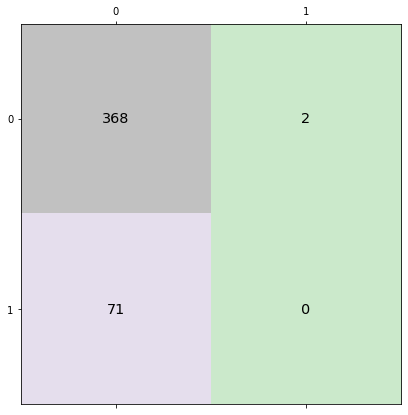

In [74]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        


plt.show()

In [75]:

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

precision_orginal=round(precision_score(y_test,y_pred),4)
recall_orginal=round(recall_score(y_test,y_pred),4)
f1score=round(f1_score(y_test,y_pred),4)
print(precision_orginal,recall_orginal,f1score)
metrics_orginal=[precision_orginal,recall_orginal,f1score]
orginal=pd.DataFrame(metrics_orginal)
orginal.index=['precision','recall','f1score']
orginal.columns=['From basic dataset']
orginal['Comment']=['Predicted all non attrition correctly',
                   'Less than 1 % attrition predicted','']
orginal


0.0 0.0 0.0


,From basic dataset,Comment
precision,0.0,Predicted all non attrition correctly
recall,0.0,Less than 1 % attrition predicted
f1score,0.0,


 # Comments
As business problem is  to predict attritrion minority class, we have to focus more on recall,

Focusing more on recall to reduce false negatives, as in this case it is harmful to predict an employee who is likely for attrition as non attrition,  than predicting a non attrition employee as potential attrition

The potential cause of base model to arrive at this conclusion may be because of imbalance data set and the algorithm is incapable of distinguishing between minority and majority class, so here we are trying to handle the unbalanced data to make more accurate prediction

# Handling Imbalanced Dataset
This is highly imbalanced data with almost 84 % data commiting towards non attrition and 16% attrition
As, the project aims to predict attrition, training the model with imbalanced data set may not be effective representative pf population as the sample is baised.
In this case minority class 'Attrition' = 1 is less and its is more important. So in this case the models efficacy depends on the ability to predict attrition or minority class correctly
 # Dealing with imbalanced dataset
 
     Identifying correct metrics to Use
     
     Shifting the threshold for computation
     
    
 Following are the few ways to handle unbalance data.
 
 
    1. Data Level Approach

        Random under-sampling
        
        Cluster based over sampling
        
        Synthetic Minority Over-sampling Technique
        
        Modified Synthetic Minority Over-sampling Technique
        
        
    2. Algorithm Ensemble
    
        Bagging
        
        Boosting
        
        Adaptive Boosting (Ada-boost)
        
        Gradient Tree Boosting
        
        XGBoost

# Adaboost Short Description

Many weak and inaccurate classifiers are combined to produce a highly accurate prediction. The classifer is serially trained. Samples that are misclassified in previous round are given more focus. Initially weight is equal for all the samples. Weight of misclassified instances are increased each time and weight of correctly classified instances are decreased, this will let more misclassfied sampled to be selected for the next round. After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

In [76]:
# n_estimators is the maximum number of estimators at which the boosting is terminated. Default is 50 and this can be tuned as well.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
cls = AdaBoostClassifier(n_estimators=100)

In [77]:
estimator = [100, 150, 200, 250, 300, 400, 500, 700, 1000]
for i in estimator:
    cls = AdaBoostClassifier(n_estimators=i)
    cls.fit(X_train,y_train)
    print('--------------------------------------------------------------------------------------------')
    print('------    Training Results for {} estimators   ---------'.format(i))
    predicted_output = cls.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_output)
    print('Accuracy for {} estimators is {}'.format(i, accuracy))
    print(classification_report(y_test,predicted_output))

--------------------------------------------------------------------------------------------
------    Training Results for 100 estimators   ---------
Accuracy for 100 estimators is 0.8594104308390023
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.62      0.32      0.43        71

    accuracy                           0.86       441
   macro avg       0.75      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441

--------------------------------------------------------------------------------------------
------    Training Results for 150 estimators   ---------
Accuracy for 150 estimators is 0.8571428571428571
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       370
           1       0.60      0.35      0.44        71

    accuracy                           0.86       441
   macro avg       0.74      0.65      0.68       441

In [78]:
# Choosing the best estimator from the trainned model n=1000

In [79]:
from sklearn.ensemble import AdaBoostClassifier
cls = AdaBoostClassifier(n_estimators=250)

In [80]:
cls.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=250)

In [81]:
y_pred=cls.predict(X_test)

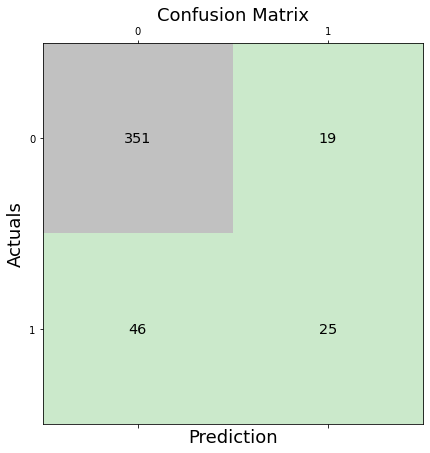

In [82]:
conf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)       

plt.show()

In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

precision_adboost=round(precision_score(y_test,y_pred),4)
recall_adboost=round(recall_score(y_test,y_pred),4)
f1score_adboost=round(f1_score(y_test,y_pred),4)
print(precision_adboost,recall_adboost,f1score_adboost)
metrics_newadboost=[precision_adboost,recall_adboost,f1score_adboost]
adboost=pd.DataFrame(list(zip(metrics_orginal,metrics_newadboost)))
adboost.index=['precision','recall','f1score']
adboost.columns=['From basic dataset','Adaboost']

0.5682 0.3521 0.4348


In [84]:
adboost

,From basic dataset,Adaboost
precision,0.0,0.5682
recall,0.0,0.3521
f1score,0.0,0.4348


# Changing the threshold

To understand how changing the threshold we can improve the  efficacy of the model, we will iterate over a series of values ranging from 0.1 to 0.75, to identify which threshold fits the pattern

In [92]:
from sklearn.ensemble import AdaBoostClassifier
cl = AdaBoostClassifier(n_estimators=300)

In [93]:
cl.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=300)

In [95]:
cols=['Metrics','Orginal']
adj_threshold=pd.DataFrame()
adj_threshold['orginal']=metrics_orginal

thresholds=[j/20 for j in range(1,16)]
for i in thresholds:
    y_pred_threshold=(cl.predict_proba(X_test)[:,1]>i).astype(int)
    precision_adboost_threshold=round(precision_score(y_test,y_pred_threshold,average='binary'),4)
    recall_adboost_threshold=round(recall_score(y_test,y_pred_threshold,average='binary'),4)
    f1score_adboost_threshold=round(f1_score(y_test,y_pred_threshold,average='binary'),4)
    metrics_adboost_threshold=[precision_adboost_threshold,recall_adboost_threshold,f1score_adboost_threshold]
    name='Threshold :'+ str(i)
    adj_threshold[name]=metrics_adboost_threshold
    cols.append(name)
adj_threshold.index=['Precision','Recall','F1Score']
adj_threshold=adj_threshold.reset_index()
adj_threshold.columns=cols
adj_threshold.transpose()

adj_threshold1=adj_threshold.transpose().iloc[1:,:]
adj_threshold1.columns=adj_threshold.iloc[:,0]
adj_threshold1



Metrics,Precision,Recall,F1Score
Orginal,0,0,0
Threshold :0.05,0.161,1,0.2773
Threshold :0.1,0.161,1,0.2773
Threshold :0.15,0.161,1,0.2773
Threshold :0.2,0.161,1,0.2773
Threshold :0.25,0.161,1,0.2773
Threshold :0.3,0.161,1,0.2773
Threshold :0.35,0.161,1,0.2773
Threshold :0.4,0.161,1,0.2773
Threshold :0.45,0.161,1,0.2773


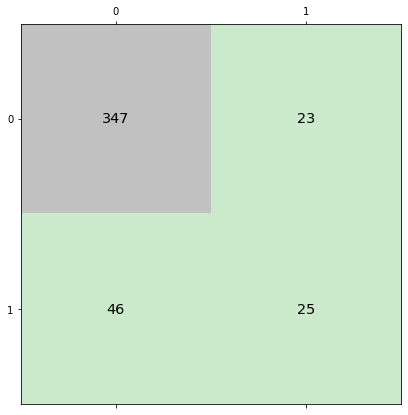

In [98]:
y_pred_thresholdn=(cl.predict_proba(X_test)[:,1]>0.50).astype(int)
conf_matrix=confusion_matrix(y_test,y_pred_thresholdn)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        

plt.show()

In [99]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

precision_adboost_thr=round(precision_score(y_test,y_pred_thresholdn),4)
recall_adboost_thr=round(recall_score(y_test,y_pred_thresholdn),4)
f1score_adboost_thr=round(f1_score(y_test,y_pred_thresholdn),4)
print(precision_adboost_thr,recall_adboost_thr,f1score_adboost_thr)
metrics_newadboost_thr=[precision_adboost_thr,recall_adboost_thr,f1score_adboost_thr]
adboost_thr=pd.DataFrame(list(zip(metrics_orginal,metrics_newadboost,metrics_newadboost_thr)))
adboost_thr.index=['precision','recall','f1score']
adboost_thr.columns=['From basic dataset','Adaboost','metrics_newadboost_thr']
# orginal['Comment']=['Predicted all non attrition correctly',
#                    'Less than 1 % attrition predicted','']
adboost_thr

0.5208 0.3521 0.4202


,From basic dataset,Adaboost,metrics_newadboost_thr
precision,0.0,0.5682,0.5208
recall,0.0,0.3521,0.3521
f1score,0.0,0.4348,0.4202


# Oversampling
Oversample to make equal proportion of minority and majority classes, In oversampling we increase the propotion of minority class

Oversampling keeping

--- minority class in equal proportion

--- minority class in 1:2 proportion

In [101]:
from sklearn.utils import resample

In [102]:
train_data=pd.concat([X_train,y_train],axis=1)
attrition_zero=train_data[train_data.Attrition==0]
attrition_one=train_data[train_data.Attrition==1]
attrition_list=[len(attrition_zero),int(len(attrition_zero)*2/3)]
for i in attrition_list:
    upsampled_one=resample(attrition_one,replace=True,n_samples=i,random_state=27)
    if i==len(attrition_zero):
        upsample_equal_proportion=pd.concat([attrition_zero,upsampled_one])
    else:
        upsample_twothree_proportion=pd.concat([attrition_zero,upsampled_one])

In [103]:
print('The distribution of minority and majority in equal proportion')
upsample_equal_proportion['Attrition'].value_counts()

The distribution of minority and majority in equal proportion


1    863
0    863
Name: Attrition, dtype: int64

In [104]:
print('The distribution of minority and majority in 2-3 proportion')
upsample_twothree_proportion['Attrition'].value_counts()

The distribution of minority and majority in 2-3 proportion


0    863
1    575
Name: Attrition, dtype: int64

In [105]:
# Training the model on oversampled dataset
# Training on equal proportion

In [106]:
X_train_upsampled=upsample_equal_proportion.drop(columns=['Attrition'])
y_train_upsampled=upsample_equal_proportion['Attrition']
upsample_data_equal = AdaBoostClassifier(n_estimators=250)
upsample_data_equal.fit(X_train_upsampled,y_train_upsampled)

AdaBoostClassifier(n_estimators=250)

In [107]:
y_pred_upsample_equal=upsample_data_equal.predict(X_test)

In [108]:
accurac= accuracy_score(y_test,y_pred_upsample_equal )
accurac

0.7868480725623582

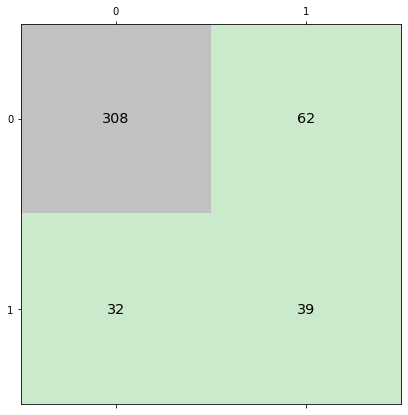

In [109]:
conf_matrix=confusion_matrix(y_test,y_pred_upsample_equal)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        

plt.show()

In [110]:
precision_oversample_e=round(precision_score(y_test,y_pred_upsample_equal),4)
recall_oversample_e=round(recall_score(y_test,y_pred_upsample_equal),4)
f1score_oversample_e=round(f1_score(y_test,y_pred_upsample_equal),4)
print(precision_oversample_e,recall_oversample_e,f1score_oversample_e)
metrics_oversample_e=[precision_oversample_e,recall_oversample_e,f1score_oversample_e]
adboost_oversample=pd.DataFrame(list(zip(metrics_orginal,metrics_newadboost,metrics_newadboost_thr,metrics_oversample_e)))
adboost_oversample.index=['precision','recall','f1score']
adboost_oversample.columns=['From basic dataset','Adaboost','metrics_newadboost_thr','adboost_oversample']
# orginal['Comment']=['Predicted all non attrition correctly',
#                    'Less than 1 % attrition predicted','']
adboost_oversample

0.3861 0.5493 0.4535


,From basic dataset,Adaboost,metrics_newadboost_thr,adboost_oversample
precision,0.0,0.5682,0.5208,0.3861
recall,0.0,0.3521,0.3521,0.5493
f1score,0.0,0.4348,0.4202,0.4535


In [111]:
# Training on oversampled dataset wIth 2:3 minority and majority class

In [112]:
X_train_upsampled_2=upsample_twothree_proportion.drop(columns=['Attrition'])
y_train_upsampled_2=upsample_twothree_proportion['Attrition']
upsample_data_2 = AdaBoostClassifier(n_estimators=250)
upsample_data_2.fit(X_train_upsampled_2,y_train_upsampled_2)

AdaBoostClassifier(n_estimators=250)

In [114]:
y_pred_upsample_pred_2=upsample_data_2.predict(X_test)

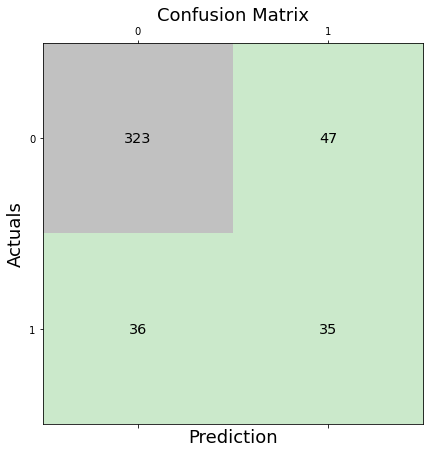

In [115]:
conf_matrix=confusion_matrix(y_test,y_pred_upsample_pred_2)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

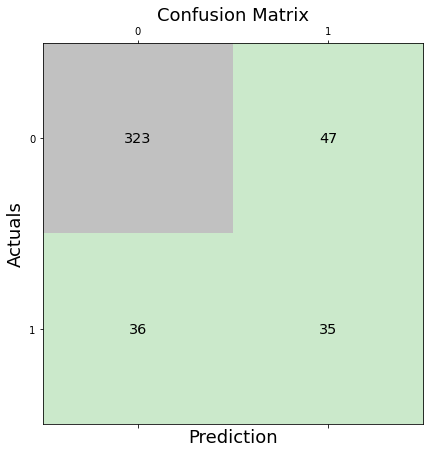

In [116]:
conf_matrix=confusion_matrix(y_test,y_pred_upsample_pred_2)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [117]:
precision_oversample_2=round(precision_score(y_test,y_pred_upsample_pred_2),4)
recall_oversample_2=round(recall_score(y_test,y_pred_upsample_pred_2),4)
f1score_oversample_2=round(f1_score(y_test,y_pred_upsample_pred_2),4)
print(precision_oversample_2,recall_oversample_2,f1score_oversample_2)
metrics_oversample_2=[precision_oversample_2,recall_oversample_2,f1score_oversample_2]
adboost_oversample_2=pd.DataFrame(list(zip(metrics_orginal,metrics_newadboost,metrics_newadboost_thr,metrics_oversample_e,metrics_oversample_2)))
adboost_oversample_2.index=['precision','recall','f1score']
adboost_oversample_2.columns=['From basic dataset','Adaboost','metrics_newadboost_thr','adboost_oversample','adboost_oversample_2']
# orginal['Comment']=['Predicted all non attrition correctly',
#                    'Less than 1 % attrition predicted','']
adboost_oversample_2

0.4268 0.493 0.4575


,From basic dataset,Adaboost,metrics_newadboost_thr,adboost_oversample,adboost_oversample_2
precision,0.0,0.5682,0.5208,0.3861,0.4268
recall,0.0,0.3521,0.3521,0.5493,0.4930
f1score,0.0,0.4348,0.4202,0.4535,0.4575


# Downsampling

In [118]:
for i in attrition_list:
    downsampled=resample(attrition_zero,replace=False,n_samples=len(attrition_one),random_state=27)
    
downsampleddf=pd.concat([downsampled,attrition_one])
downsampleddf

,MonthlyRate,DailyRate,OverTime,StockOptionLevel,Age,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,RelationshipSatisfaction,Department,WorkLifeBalance,Education,HourlyRate,PercentSalaryHike,Attrition
1247,20943,1003,0,1,31,5,5,1,1,51,...,3,1,3,3,2,3,3,51,19,0
1013,12761,855,0,2,30,7,3,4,2,73,...,1,7,3,2,2,3,4,73,14,0
1435,13422,1037,1,0,44,1,2,2,1,42,...,4,6,2,3,1,3,3,42,12,0
526,20978,408,0,0,39,2,5,4,2,80,...,3,1,4,1,1,3,4,80,11,0
766,12853,1464,1,1,50,2,2,2,1,62,...,3,2,2,4,1,2,4,62,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,13008,129,0,0,20,4,5,1,1,84,...,1,1,2,2,1,3,3,84,19,1
1136,7324,329,1,3,28,24,2,3,1,51,...,2,1,3,3,1,3,3,51,17,1
871,3372,984,0,1,24,17,1,4,2,97,...,2,1,3,1,1,1,2,97,13,1
1298,10842,261,0,1,46,21,2,4,2,66,...,2,4,2,4,1,4,2,66,22,1


In [119]:
downsampleddf['Attrition'].value_counts()

1    166
0    166
Name: Attrition, dtype: int64

In [120]:
X_train_downsampled=downsampleddf.drop(columns=['Attrition'])
y_train_downsampled=downsampleddf['Attrition']


In [121]:
downsampledmodl = AdaBoostClassifier(n_estimators=250)
downsampledmodl.fit(X_train_upsampled_2,y_train_upsampled_2)

AdaBoostClassifier(n_estimators=250)

In [122]:
y_pred_downsample=downsampledmodl.predict(X_test)

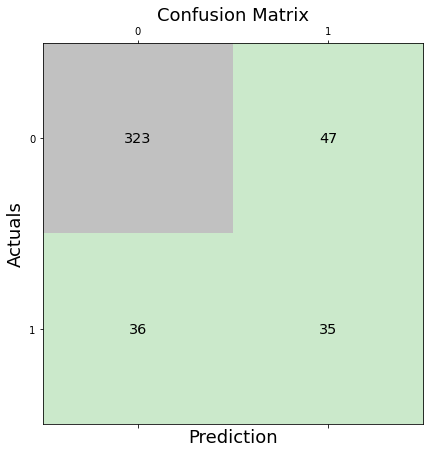

In [123]:
conf_matrix=confusion_matrix(y_test,y_pred_downsample)
fig,ax=plt.subplots(figsize=(7,7))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [124]:
precision_downsample=round(precision_score(y_test,y_pred_downsample),4)
recall_downsample=round(recall_score(y_test,y_pred_downsample),4)
f1score_downsample=round(f1_score(y_test,y_pred_downsample),4)
print(precision_downsample,recall_downsample,f1score_downsample)
metrics_downsample=[precision_downsample,recall_downsample,f1score_downsample]
adboost_downsample=pd.DataFrame(list(zip(metrics_orginal,metrics_newadboost,metrics_newadboost_thr,metrics_oversample_e,metrics_oversample_2,metrics_downsample)))
adboost_downsample.index=['precision','recall','f1score']
adboost_downsample.columns=['From basic dataset','Adaboost','metrics_newadboost_thr','adboost_oversample','adboost_oversample_2','adboost_downsample']
# orginal['Comment']=['Predicted all non attrition correctly',
#                    'Less than 1 % attrition predicted','']
adboost_downsample

0.4268 0.493 0.4575


,From basic dataset,Adaboost,metrics_newadboost_thr,adboost_oversample,adboost_oversample_2,adboost_downsample
precision,0.0,0.5682,0.5208,0.3861,0.4268,0.4268
recall,0.0,0.3521,0.3521,0.5493,0.4930,0.4930
f1score,0.0,0.4348,0.4202,0.4535,0.4575,0.4575


# Training with random forest with hyperparamater tunning with Randomized search CV and Grid Search CV

In this case, we can observe that the model with optimal threshold set was giving higher recall and less False negatives satisfying business objective, However the precision is very less therby lesser F1 score the model may not in this case generalize well

In Model with oversampling in equal proprotion gave better precision and F1 score, we will choose this model and perform hyperparameter tunning on the data and observe whether the accuracy metrics improve


# Hyperparameter Tuning

Model Hyperparameter tuning is very useful to enhance the performance of a machine learning model.

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model. Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least. 

Steps to follow for hyperparameter tuning

    Select the type of model we want to use like RandomForestClassifier, regressor or any other model

    Check what are the parameters of the model

    Select the methods for searching the hyperparameter (Randomized and Grid search CV)

    Select the cross-validation approach

    Evaluate the model using the score
    
Difference between  RandomSearchCV and GridSearchCV

GridsearchCV
    
    We try every combination of a present list of values of the hyper-parameters and choose the best combination based on           the cross validation score.
        - It takes a lot of time to fit (because it will try all the combinations)
        
        + gives us the best hyper-parameters

RandomizedSearchCV

    Tries random combinations of a range of values (we have to define the number of iterations). It is good at testing wide      range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give    the best parameter combination because not all parameter values are tried out (recommended for big datasets or high number of    parameters to tune.
    
     It doesn't guarantee that we have the best parameters
     faster because not all parameter values are tried out
     
     
In our case, will use randomizedcv to select best random parameters and then we will train on gridsearchcv to select the best 




In [126]:
# importing Random forest library
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# numbers of trees in random forest 
n_estimators=[int (x) for x in np.linspace(start=200,stop=2000,num=10)] # linspace() starts from 200 and iterate till 2000 making 10 divisions

# Number of features to consider at every split criteria

max_features=['auto','sqrt','log2']

# Maximum number of levels in the tree

max_depth=[int(x) for x in np.linspace(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2,3,5,7]
# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 5, 7], 'min_samples_leaf': [1, 2, 4, 6], 'criterion': ['entropy', 'gini']}


In [127]:
randomforestmodel=RandomForestClassifier()

randomforest_randomcvmodel=RandomizedSearchCV(estimator=randomforestmodel,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
randomforest_randomcvmodel.fit(X_train_upsampled,y_train_upsampled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 3, 5, 7],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [128]:
randomforest_randomcvmodel.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 230,
 'criterion': 'gini'}

# Pickling the model

In [129]:
import pickle

In [130]:
pickle.dump(adboost,open('upsample_data_equal.pkl','wb'))


In [131]:
pickled_model=pickle.load(open('upsample_data_equal.pkl','rb')) 